In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings; warnings.simplefilter('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/test.csv


# Load Data

In [2]:
train=data=pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
submission=pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')

print(train.shape, test.shape, submission.shape)

(10886, 12) (6493, 9) (6493, 2)


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

## Target Variable

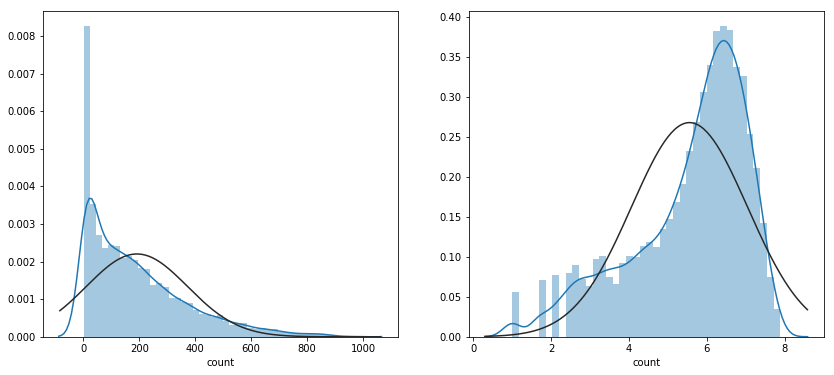

In [4]:
Ytrain=train['count']

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(Ytrain, ax=ax1, fit=norm)
sns.distplot(np.log(Ytrain)+1, ax=ax2, fit=norm)

## Missing Value

In [5]:
feature_names=list(test)
train=train[feature_names]
all_data=pd.concat((train, test))
print(train.shape, test.shape, all_data.shape)

(10886, 9) (6493, 9) (17379, 9)


In [6]:
all_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## Datetime

In [7]:
all_data['datetime']=pd.to_datetime(all_data['datetime'])
all_data['year']=all_data['datetime'].dt.year
all_data['month']=all_data['datetime'].dt.month
all_data['day']=all_data['datetime'].dt.day
all_data['hour']=all_data['datetime'].dt.hour
all_data['dayofweek']=all_data['datetime'].dt.dayofweek
all_data=all_data.drop(columns='datetime')

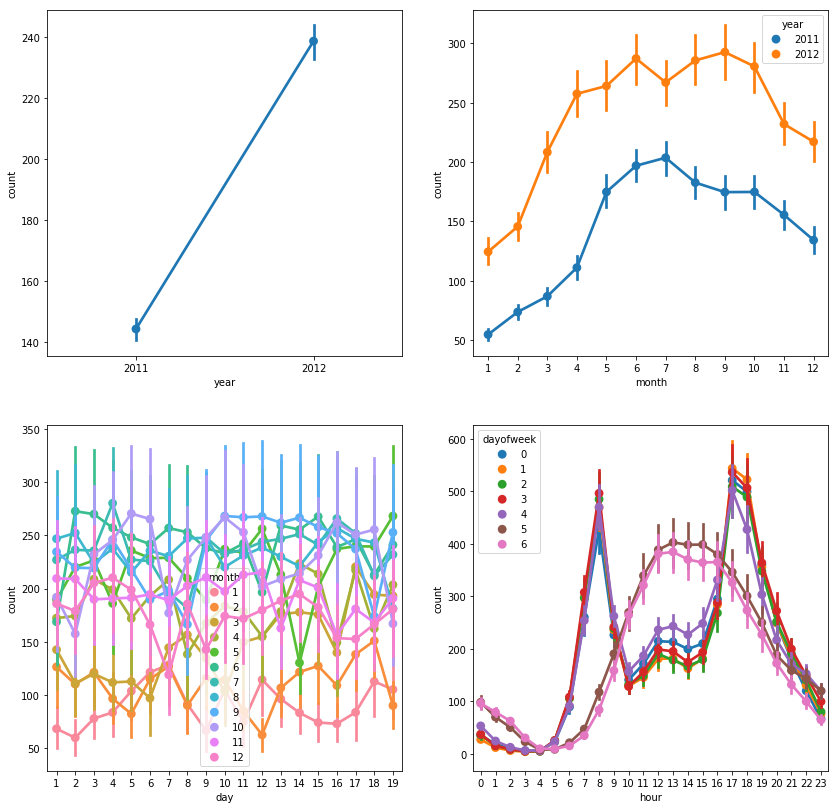

In [8]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,14)
sns.pointplot(data=all_data[:len(train)], x='year', y=Ytrain, ax=ax1)
sns.pointplot(data=all_data[:len(train)], x='month', y=Ytrain, ax=ax2, hue='year')
sns.pointplot(data=all_data[:len(train)], x='day', y=Ytrain, ax=ax3, hue='month')
sns.pointplot(data=all_data[:len(train)], x='hour', y=Ytrain, ax=ax4, hue='dayofweek')

In [9]:
all_data=all_data.drop(columns=['month', 'day'])

In [10]:
all_data['weekend']=(all_data['dayofweek']==5) | (all_data['dayofweek']==6)

## Season

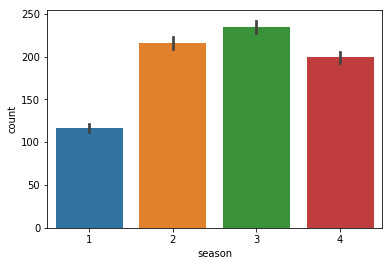

In [11]:
sns.barplot(data=all_data[:len(train)], x='season', y=Ytrain)

In [12]:
season_encoded=pd.get_dummies(all_data['season'], prefix='season_')
all_data=pd.concat((all_data, season_encoded), axis=1)
all_data=all_data.drop(columns='season')

## Holiday, Workingday

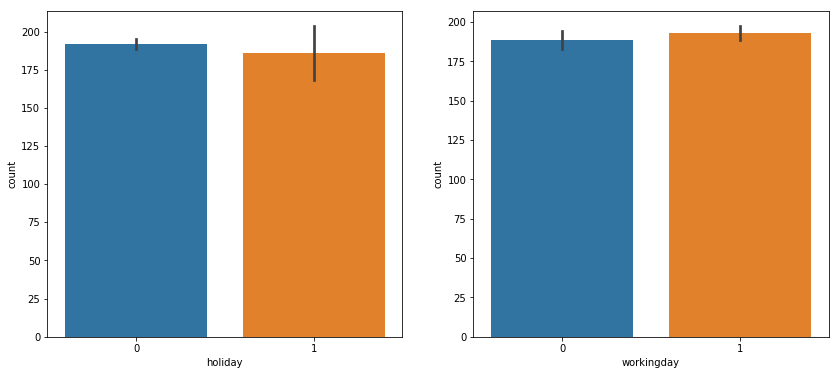

In [13]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.barplot(data=all_data[:len(train)], x='holiday', y=Ytrain, ax=ax1)
sns.barplot(data=all_data[:len(train)], x='workingday', y=Ytrain, ax=ax2)

## Weather

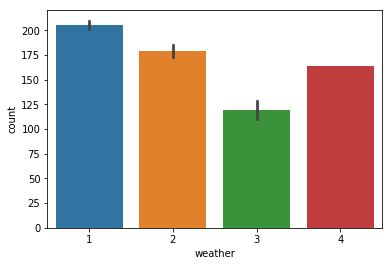

In [14]:
sns.barplot(data=all_data[:len(train)], x='weather', y=Ytrain)

In [15]:
weather_encoded=pd.get_dummies(all_data['weather'], prefix='weather_')
all_data=pd.concat((all_data, weather_encoded), axis=1)
all_data=all_data.drop(columns='weather')

## Temperature

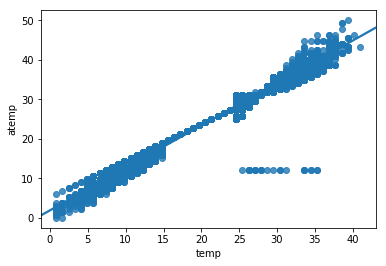

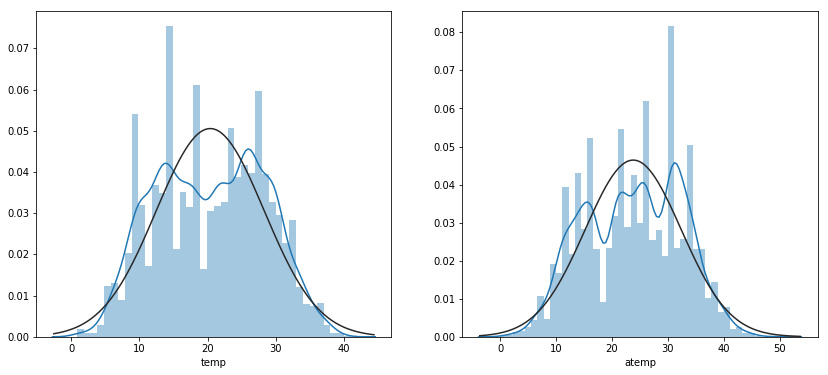

In [16]:
sns.regplot(data=all_data, x='temp', y='atemp')

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(all_data['temp'], ax=ax1, fit=norm)
sns.distplot(all_data['atemp'], ax=ax2, fit=norm)

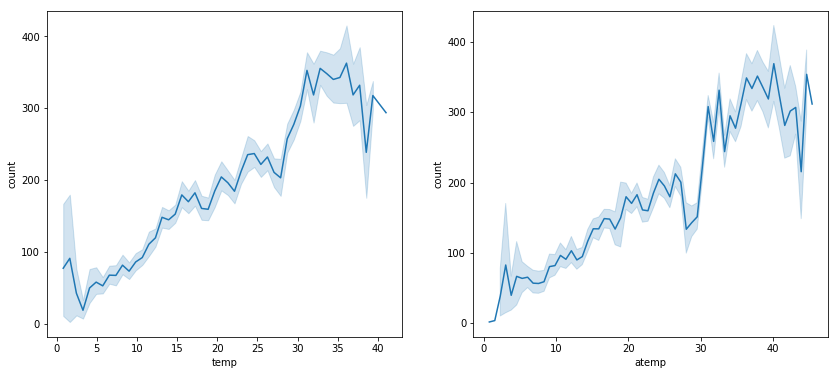

In [17]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.lineplot(data=all_data[:len(train)], x='temp', y=Ytrain, ax=ax1)
sns.lineplot(data=all_data[:len(train)], x='atemp', y=Ytrain, ax=ax2)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca=PCA(n_components=1)
pca.fit(all_data[['temp', 'atemp']])

print(f" Variance explained after PCA : {pca.explained_variance_ratio_}")

 Variance explained after PCA : [0.99388034]


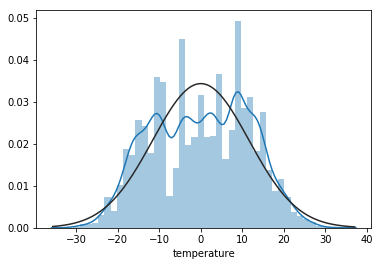

In [20]:
all_data['temperature']=pca.fit_transform(all_data[['temp','atemp']])
sns.distplot(all_data['temperature'], fit=norm)

In [21]:
all_data=all_data.drop(columns=['temp', 'atemp'])

## Humidity

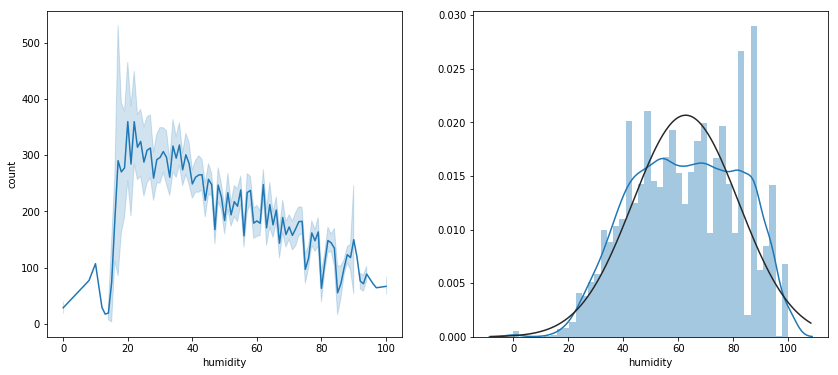

In [22]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.lineplot(data=all_data[:len(train)], x='humidity', y=Ytrain, ax=ax1)
sns.distplot(all_data['humidity'], fit=norm, ax=ax2)

## Windspeed

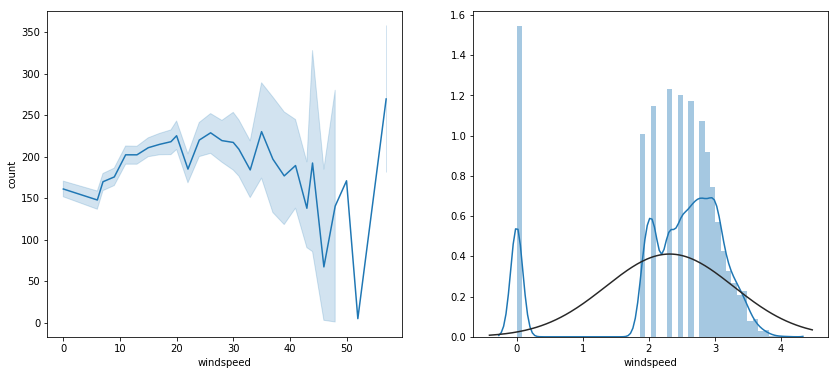

In [23]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.lineplot(data=all_data[:len(train)], x='windspeed', y=Ytrain, ax=ax1)
sns.distplot(np.log(all_data['windspeed']+1), fit=norm, ax=ax2)

In [24]:
all_data.loc[all_data['windspeed']==0, 'windspeed']=all_data['windspeed'].mean()

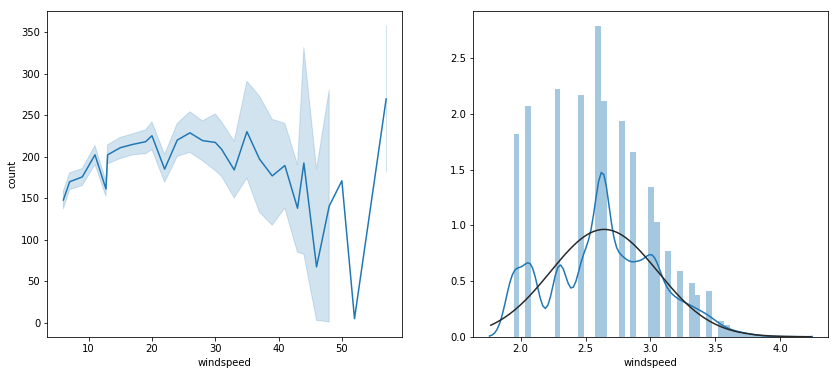

In [25]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.lineplot(data=all_data[:len(train)], x='windspeed', y=Ytrain, ax=ax1)
sns.distplot(np.log(all_data['windspeed']+1), fit=norm, ax=ax2)

# Build Models

In [26]:
Xtrain=all_data[:len(train)]
Xtest=all_data[len(train):]
Ytrain=np.log(Ytrain+1)
print(Xtrain.shape, Ytrain.shape, Xtest.shape)

(10886, 17) (10886,) (6493, 17)


In [27]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [28]:
model=LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.6746393485503049, importance_type='split',
              learning_rate=0.03158974434726661, max_bin=55, max_depth=-1,
              min_child_samples=159, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1458, n_jobs=-1, num_leaves=196, objective=None,
              random_state=18, reg_alpha=0.23417614793823338,
              reg_lambda=0.33890027779706655, silent=False,
              subsample=0.5712459474269626, subsample_for_bin=200000,
              subsample_freq=1)

In [29]:
model.fit(Xtrain, Ytrain)
log_predictions=model.predict(Xtest)
predictions=np.exp(log_predictions)-1
submission['count']=predictions
submission.to_csv('Result.csv', index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.713426
1,2011-01-20 01:00:00,4.978841
2,2011-01-20 02:00:00,3.042143
3,2011-01-20 03:00:00,1.843008
4,2011-01-20 04:00:00,1.574000
